In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df_train = pd.read_csv('C:/Users/cod/Desktop/train.csv')
df_test = pd.read_csv('C:/Users/cod/Desktop/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
for col in df_train.columns:
    msg = 'columns : {:<11} Percent of Null value : {:.2f}%'.format(col,100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

columns : PassengerId Percent of Null value : 0.00%
columns : Survived    Percent of Null value : 0.00%
columns : Pclass      Percent of Null value : 0.00%
columns : Name        Percent of Null value : 0.00%
columns : Sex         Percent of Null value : 0.00%
columns : Age         Percent of Null value : 19.87%
columns : SibSp       Percent of Null value : 0.00%
columns : Parch       Percent of Null value : 0.00%
columns : Ticket      Percent of Null value : 0.00%
columns : Fare        Percent of Null value : 0.00%
columns : Cabin       Percent of Null value : 77.10%
columns : Embarked    Percent of Null value : 0.22%


In [7]:
for col in df_test.columns:
    msg='columns : {:<11} Percent of Null value : {:.2f}%'.format(col,100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

columns : PassengerId Percent of Null value : 0.00%
columns : Pclass      Percent of Null value : 0.00%
columns : Name        Percent of Null value : 0.00%
columns : Sex         Percent of Null value : 0.00%
columns : Age         Percent of Null value : 20.57%
columns : SibSp       Percent of Null value : 0.00%
columns : Parch       Percent of Null value : 0.00%
columns : Ticket      Percent of Null value : 0.00%
columns : Fare        Percent of Null value : 0.24%
columns : Cabin       Percent of Null value : 78.23%
columns : Embarked    Percent of Null value : 0.00%


<AxesSubplot:>

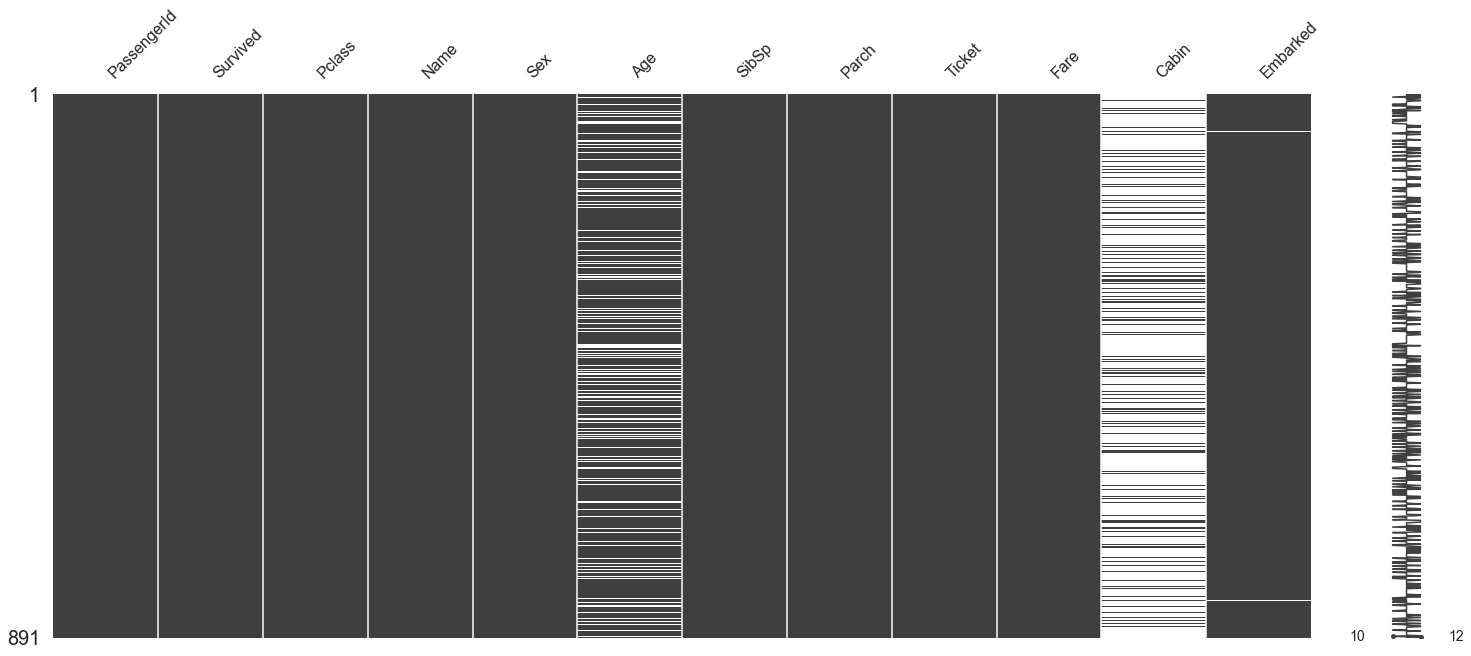

In [8]:
msno.matrix(df_train)

<AxesSubplot:>

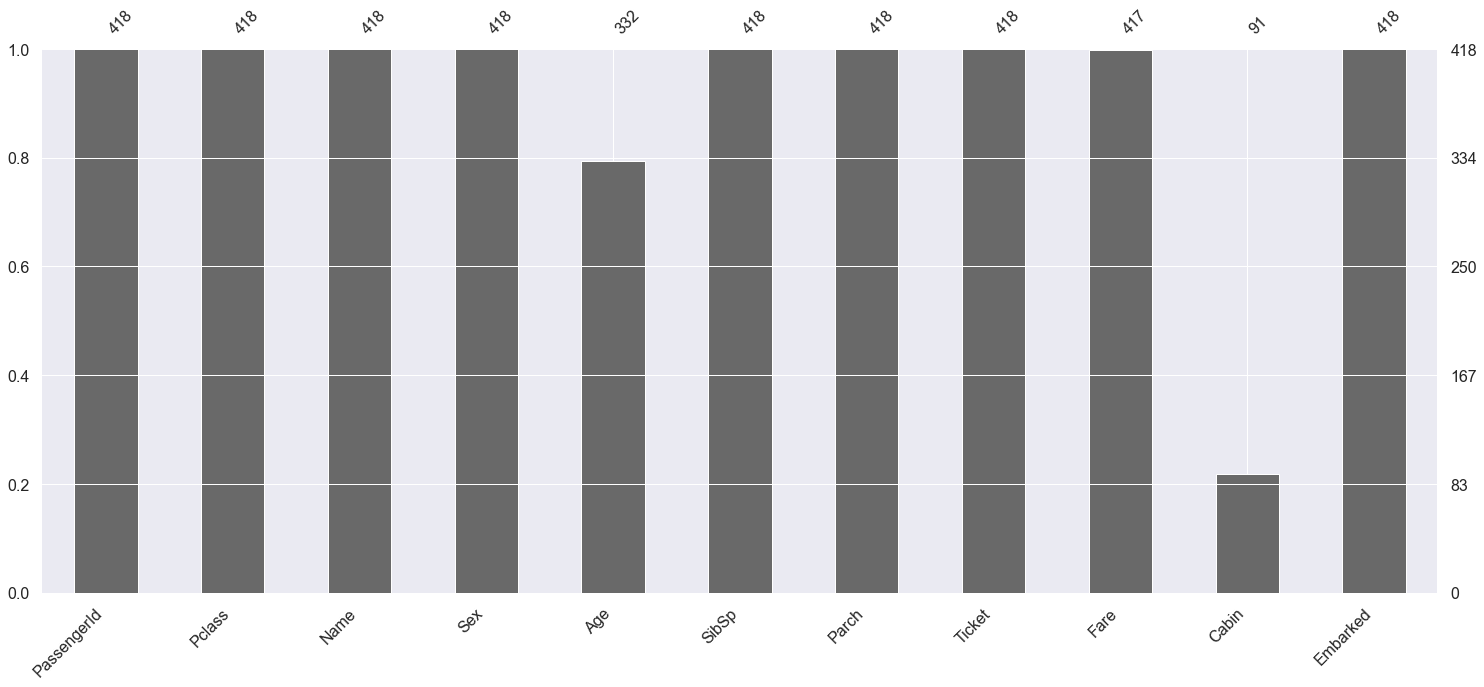

In [9]:
msno.bar(df_test)

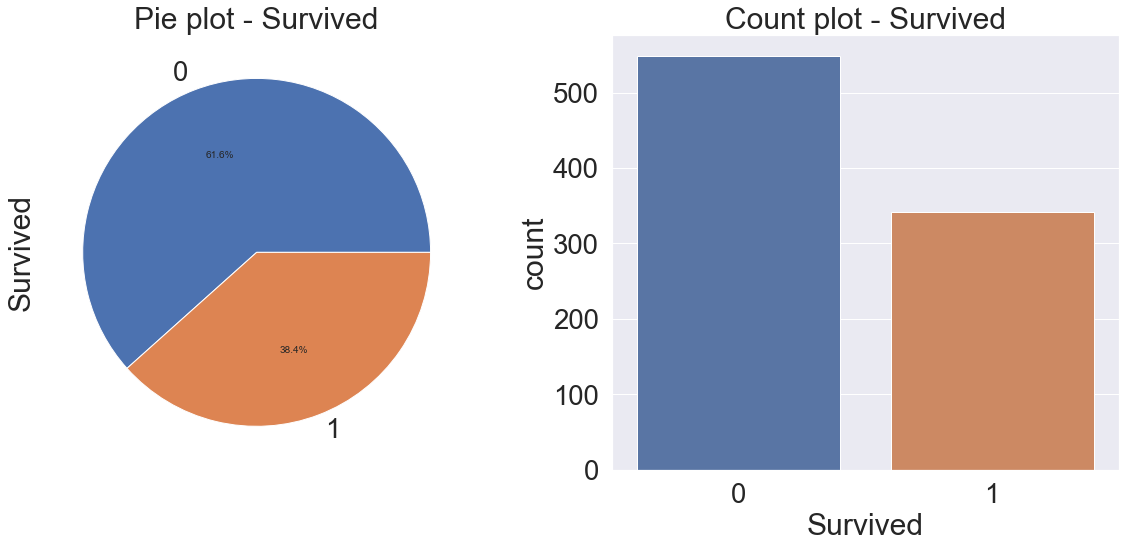

In [10]:
f,ax=plt.subplots(1,2,figsize=(20,8))

df_train['Survived'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Pie plot - Survived')
sns.countplot('Survived',data=df_train,ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

In [11]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [12]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [13]:
pd.crosstab(df_train['Pclass'],df_train['Survived'],margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


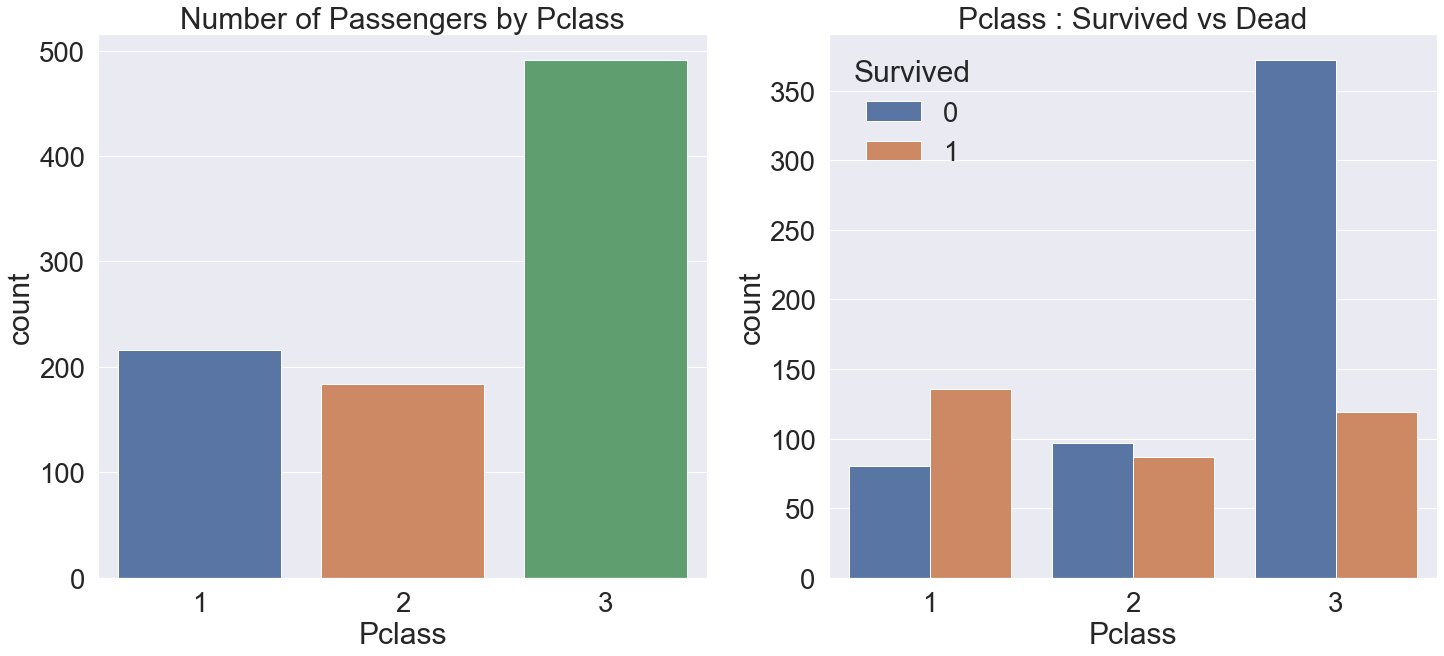

In [14]:
f,ax=plt.subplots(1,2,figsize=(24,10))
sns.countplot('Pclass',data=df_train,ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass')
sns.countplot('Pclass',data=df_train,hue='Survived',ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead')
plt.show()

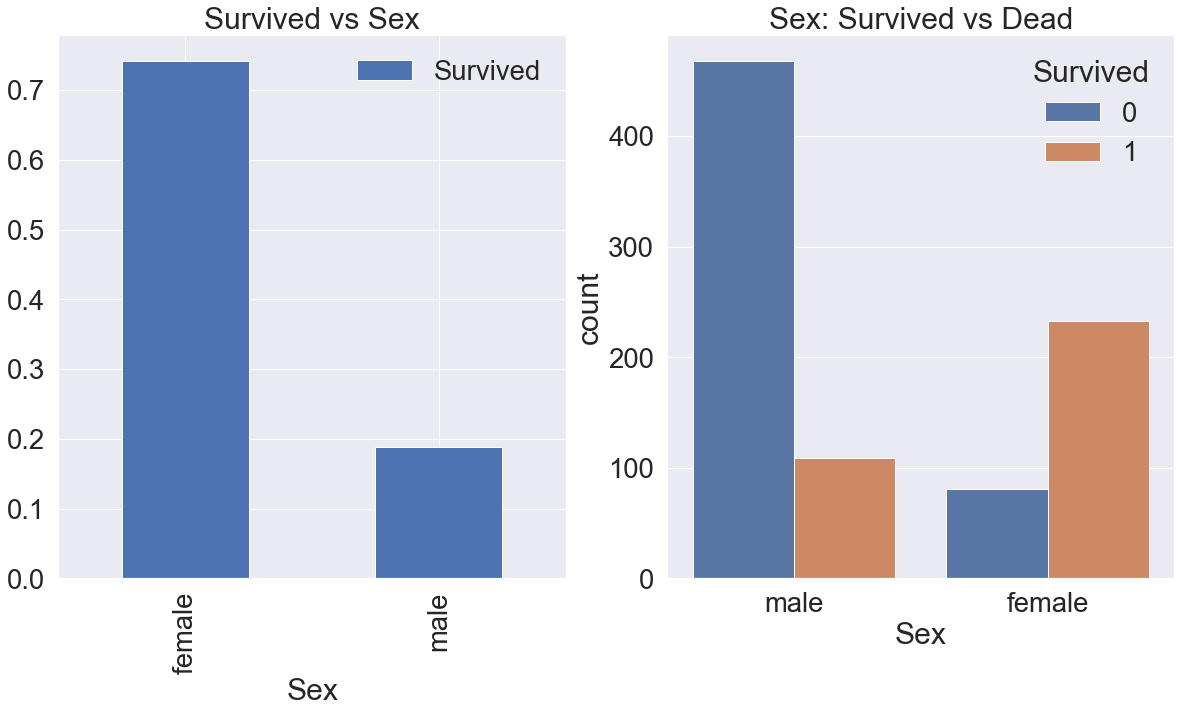

In [15]:
f,ax=plt.subplots(1,2,figsize=(20,10))
df_train[['Survived','Sex']].groupby('Sex',
                        as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',data=df_train,hue='Survived',ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

In [16]:
df_train[['Sex','Survived']].groupby(['Sex'],
    as_index=True).mean().sort_values(by='Sex',ascending=False)

,Survived
Sex,
male,0.188908
female,0.742038


In [17]:
pd.crosstab(df_train['Sex'],df_train['Survived'],margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


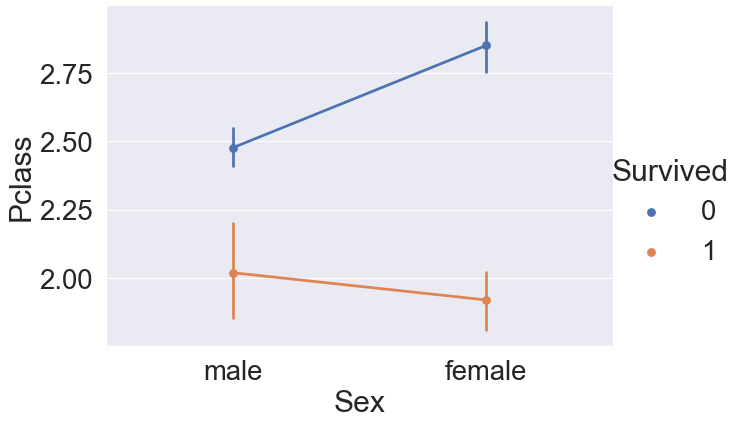

In [18]:
sns.factorplot('Sex','Pclass',data=df_train,hue='Survived',size=6,aspect=1.5)

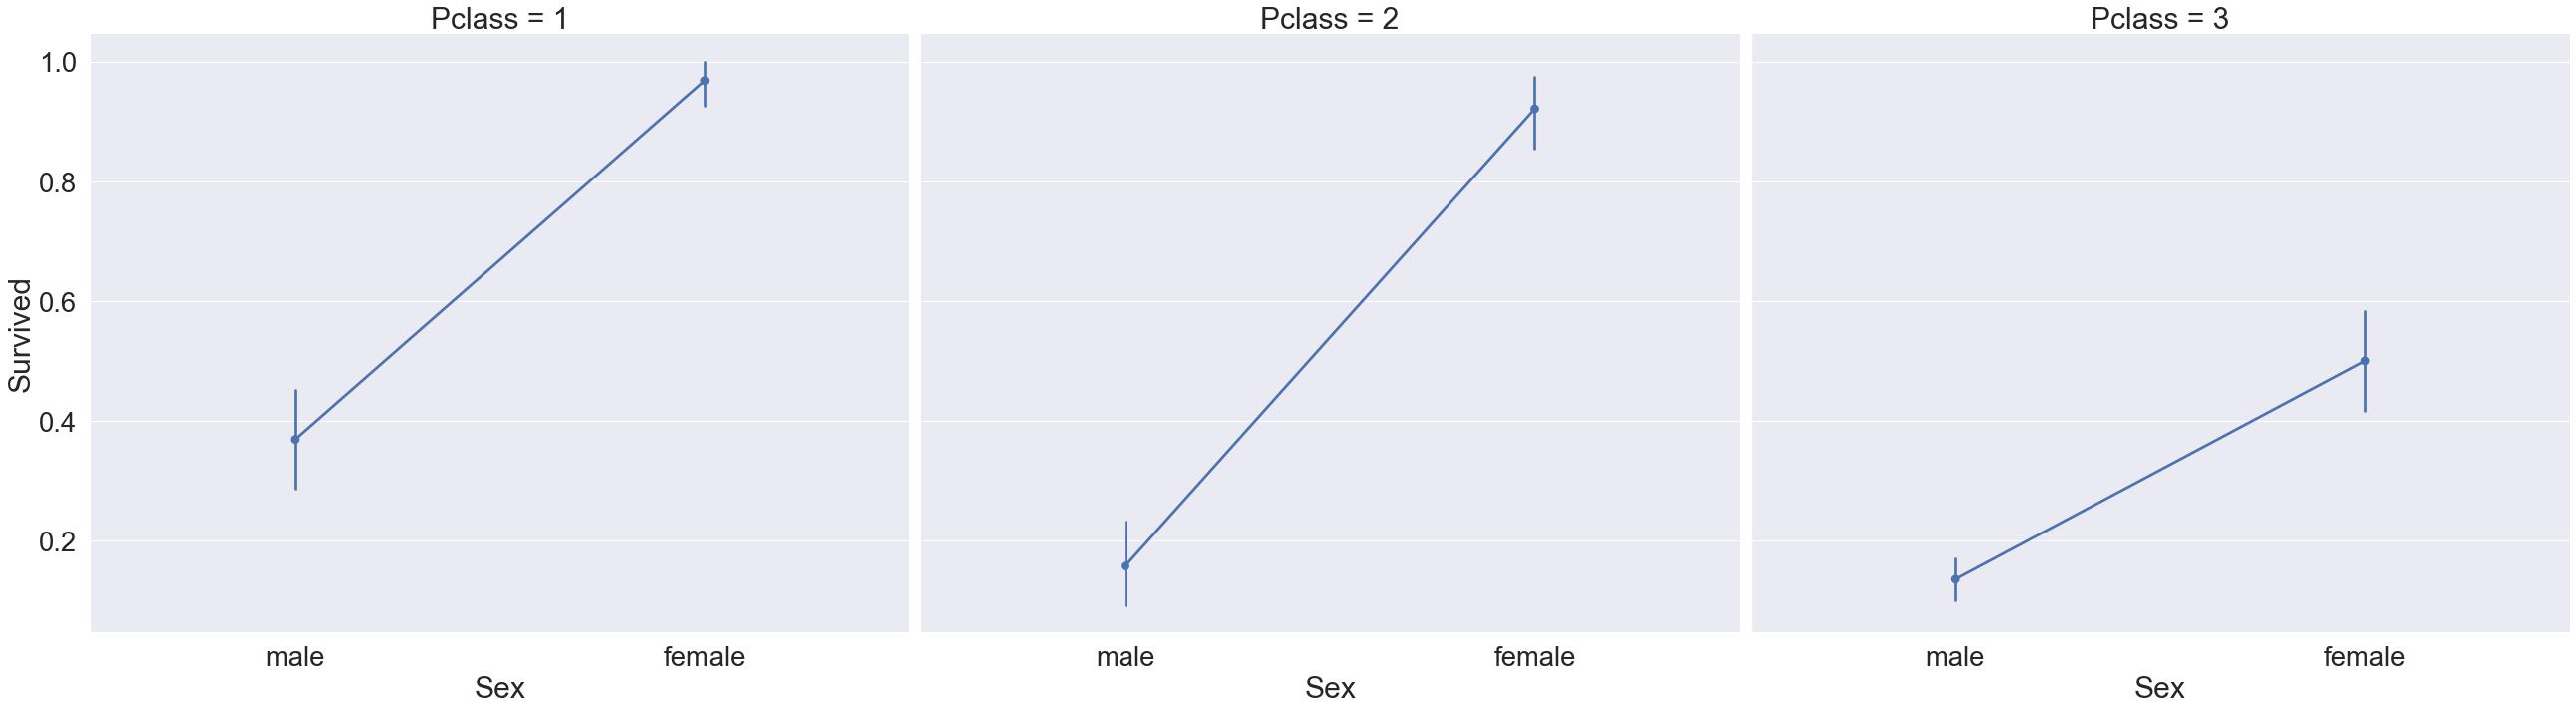

In [19]:
sns.factorplot(x='Sex',y='Survived',col='Pclass',
               data=df_train,satureation=.5,size=10,aspect=1.2)

In [20]:
print('The Oldest Passenger : {:.1f}'.format(df_train['Age'].max()))
print('The Youngest Passenger : {:.1f}'.format(df_train['Age'].min()))
print('Mean of All Passenger\'s Age : {:.1f}'.format(df_train['Age'].mean()))

The Oldest Passenger : 80.0
The Youngest Passenger : 0.4
Mean of All Passenger's Age : 29.7


<AxesSubplot:xlabel='Age', ylabel='Density'>

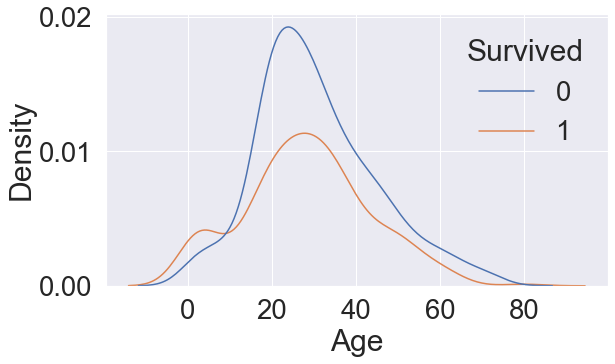

In [21]:
fig,ax=plt.subplots(1,1,figsize=(9,5))
sns.kdeplot('Age',data=df_train,hue='Survived',ax=ax)

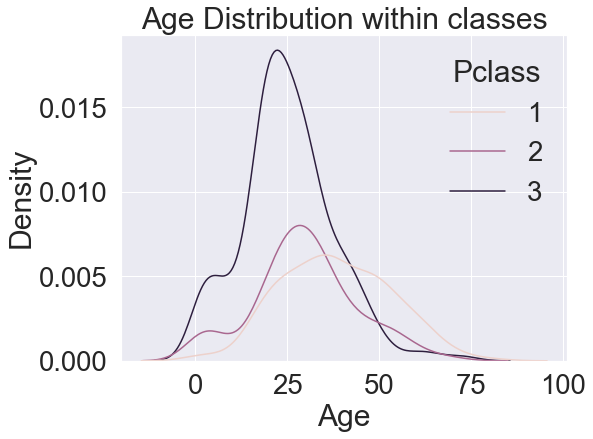

In [22]:
f,ax=plt.subplots(1,1,figsize=(8,6))

sns.kdeplot('Age',data=df_train,hue='Pclass',ax=ax)


plt.xlabel('Age')
plt.title('Age Distribution within classes')

plt.show()

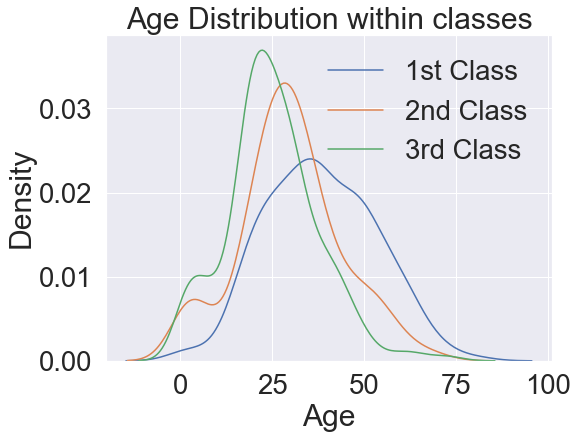

In [23]:
f,ax=plt.subplots(1,1,figsize=(8, 6))
sns.kdeplot(df_train[df_train['Pclass'] == 1]['Age'],ax=ax)
sns.kdeplot(df_train[df_train['Pclass'] == 2]['Age'],ax=ax)
sns.kdeplot(df_train[df_train['Pclass'] == 3]['Age'],ax=ax)

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.show()

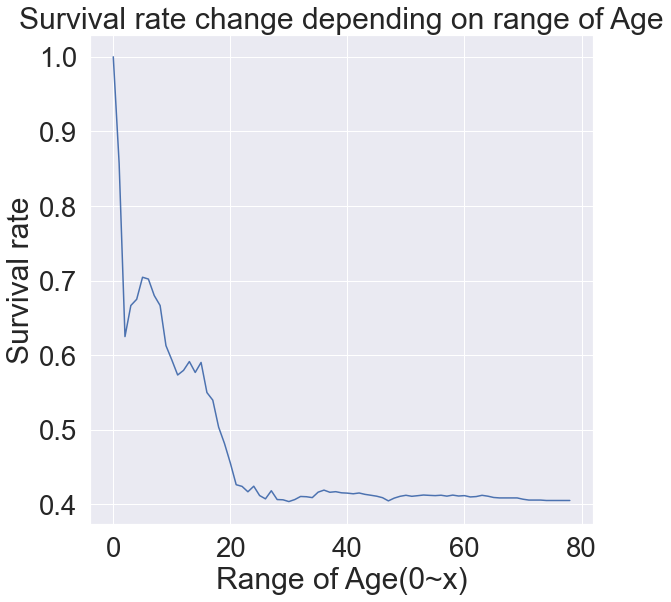

In [24]:
cummulate_survival_ratio=[]
for i in range(1,80):
    cummulate_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived']))
plt.figure(figsize=(9,9))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age')
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

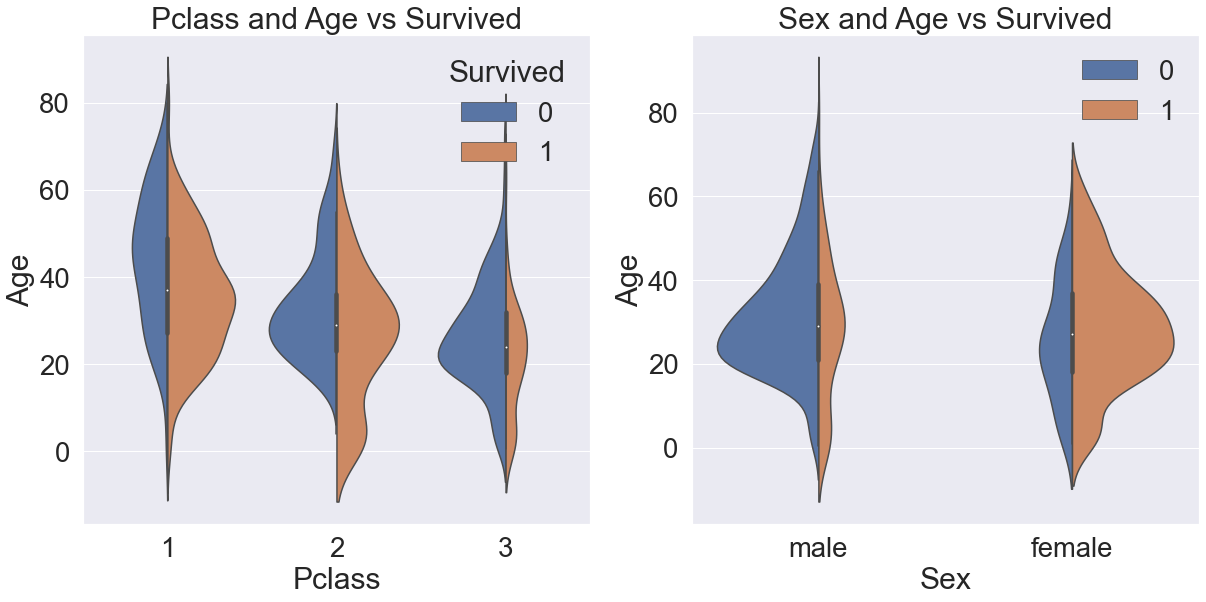

In [25]:
f,ax=plt.subplots(1,2,figsize=(20,9))

sns.violinplot('Pclass','Age',hue='Survived',data=df_train,
                scale='count',split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
sns.violinplot('Sex','Age',hue='Survived',data=df_train,
              split=True,scale='count',ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
plt.legend(loc='best')
plt.show()

<AxesSubplot:xlabel='Embarked'>

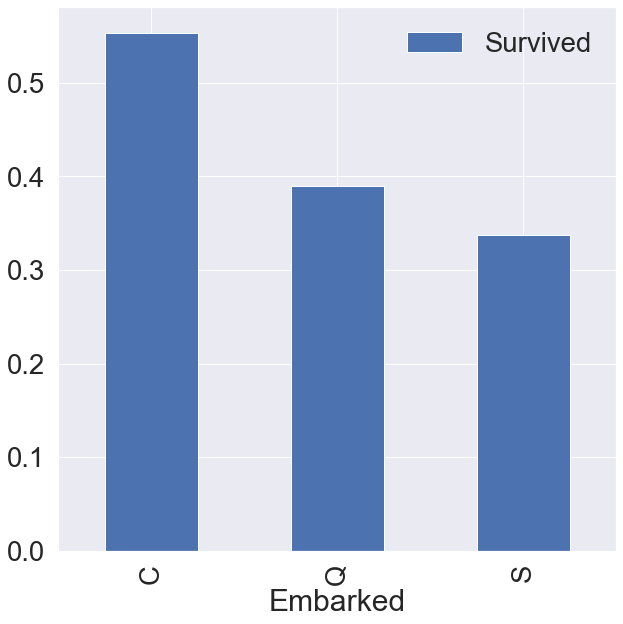

In [26]:
f,ax=plt.subplots(1,1,figsize=(10,10))
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().plot.bar(ax=ax)

In [27]:
df_train['Embarked'].count()

889

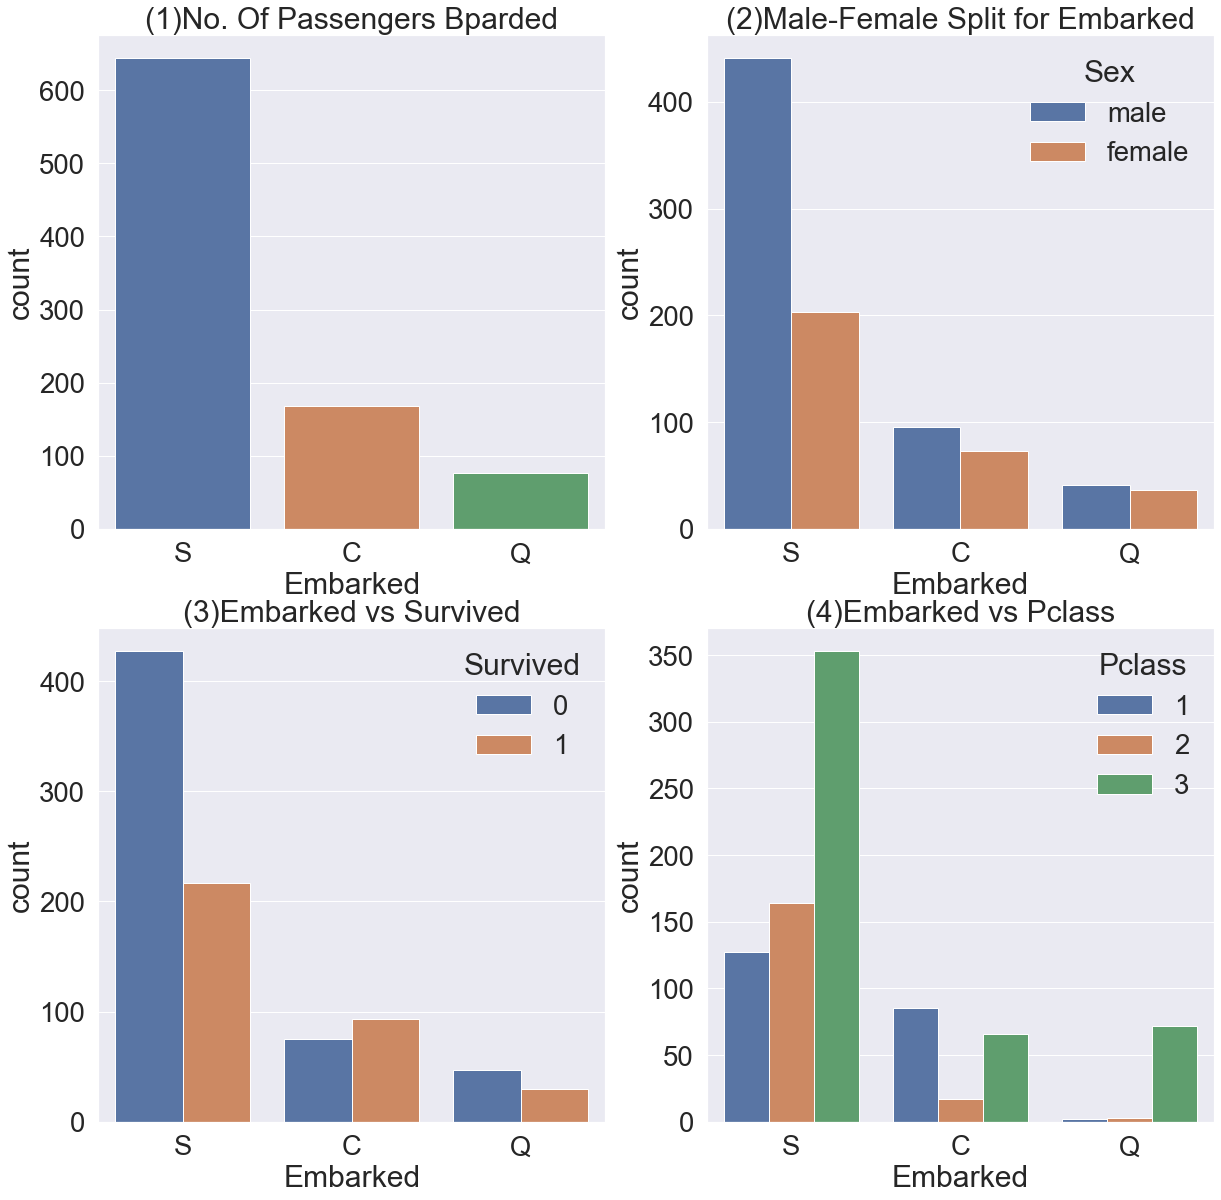

In [28]:
f,ax=plt.subplots(2,2,figsize=(20,20))
sns.countplot('Embarked',data=df_train,ax=ax[0,0])
ax[0,0].set_title('(1)No. Of Passengers Bparded')
sns.countplot('Embarked',hue='Sex',data=df_train,ax=ax[0,1])
ax[0,1].set_title('(2)Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=df_train,ax=ax[1,0])
ax[1,0].set_title('(3)Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=df_train,ax=ax[1,1])
ax[1,1].set_title('(4)Embarked vs Pclass')
plt.show()

In [29]:
df_train['FamilySize']=df_train['SibSp']+df_train['Parch']+1
df_test['FamilySize']=df_test['SibSp']+df_test['Parch']+1

In [30]:
print('Maximum size of Family :',df_train['FamilySize'].max())
print('Minimum size of Family :',df_train['FamilySize'].min())

Maximum size of Family : 11
Minimum size of Family : 1


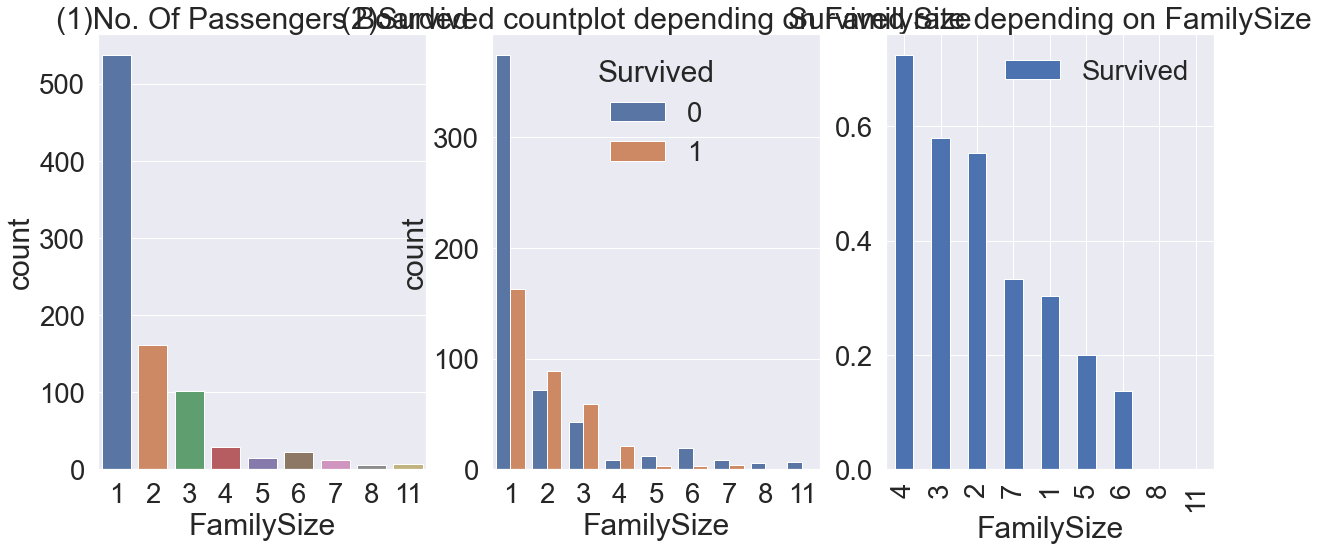

In [31]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.countplot('FamilySize',data=df_train,ax=ax[0])
ax[0].set_title('(1)No. Of Passengers Boarded')
sns.countplot('FamilySize',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('(2)Survived countplot depending on FamilySize')
df_train[['FamilySize','Survived']].groupby('FamilySize',
            as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('Survived rate depending on FamilySize')
plt.show()

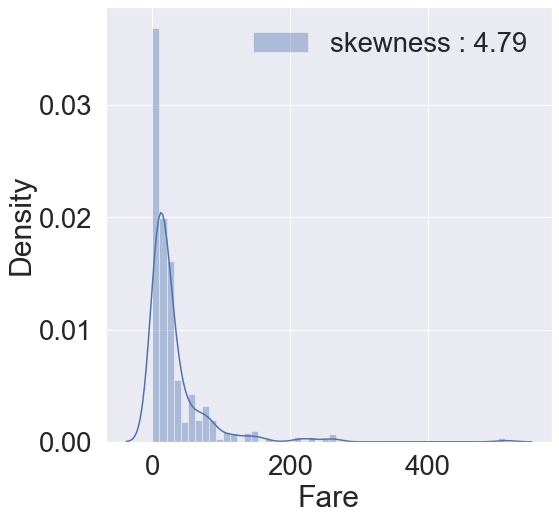

In [32]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
g=sns.distplot(df_train['Fare'],color='b',label='skewness : {:.2f}'.format(df_train['Fare'].skew()),ax=ax)
g=g.legend(loc='best')

<AxesSubplot:>

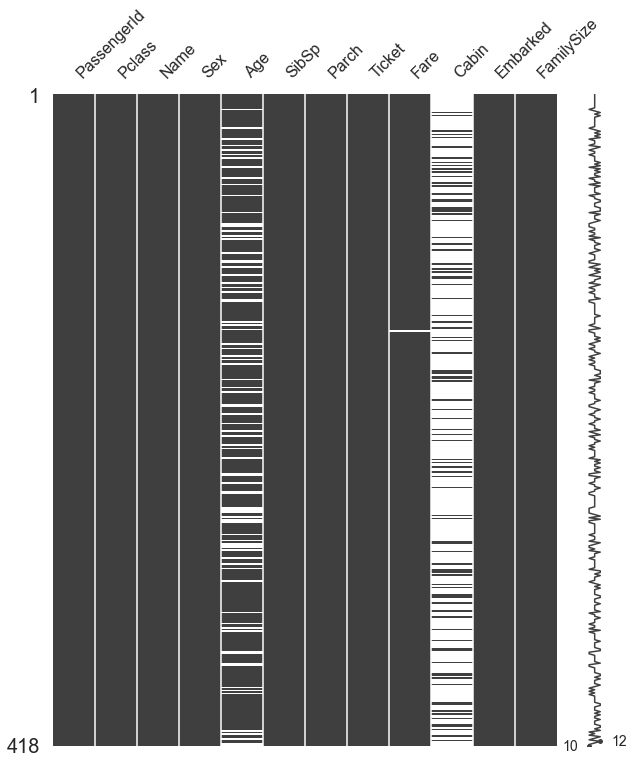

In [33]:
msno.matrix(df_test,figsize=(10,12))

In [34]:
df_test.Fare[df_test.Fare.isnull()]=df_test.Fare.mean()
#df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

In [35]:
df_test.Fare.isnull().any()

False

<AxesSubplot:>

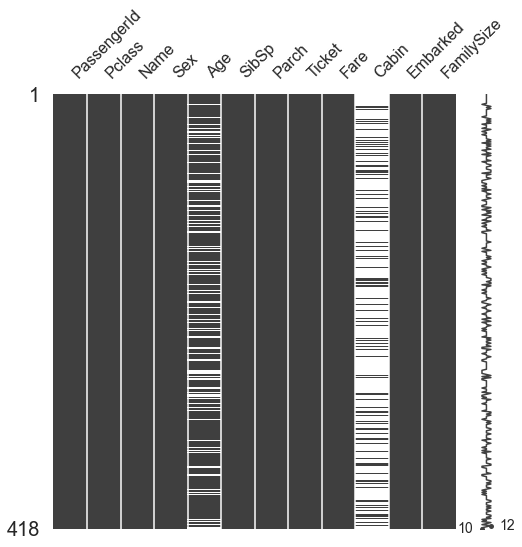

In [36]:
msno.matrix(df_test,figsize=(8,8))

<AxesSubplot:>

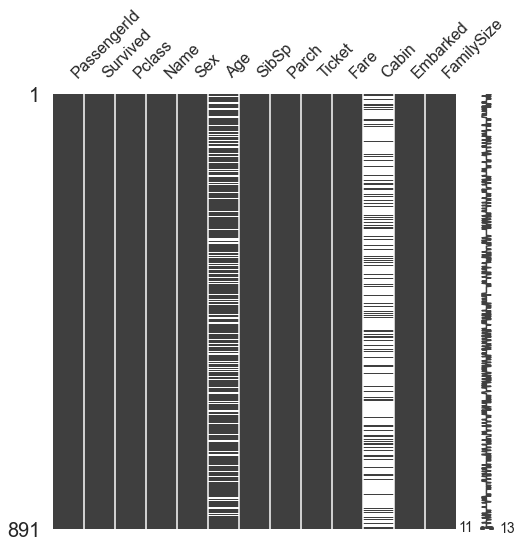

In [37]:
msno.matrix(df_train,figsize=(8,8))

In [38]:
df_train['Fare']=df_train['Fare'].map(lambda p : np.log(p) if p>0 else 0)
df_test['Fare']=df_test['Fare'].map(lambda p : np.log(p) if p>0 else 0)

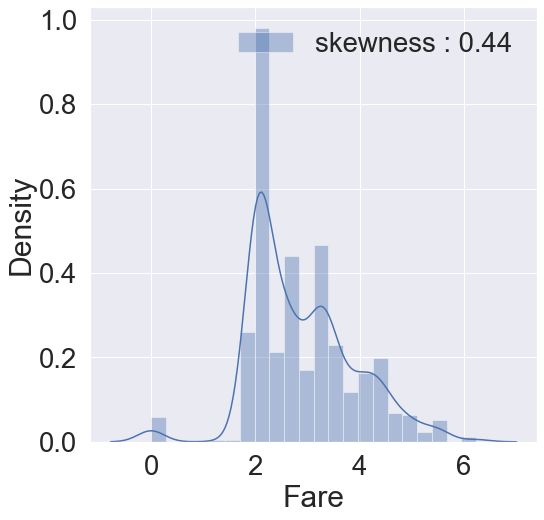

In [39]:
fig,ax=plt.subplots(1,1,figsize=(8,8))

sns.distplot(df_train.Fare,color='b',
         label='skewness : {:.2f}'.format(df_train['Fare'].skew()),
               ax=ax)
ax.legend(loc='best')


In [40]:
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.tools as tls

In [42]:
df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.')